## Machine Learning - CS60050
### Roll No: 19EC30055
### Name: Ujwal Nitin Nayak
### Assignment No: 3

### Introduction

- The K-Means Clustering algorithm is one of the simplest and most popular unsupervised learning algorithms. 
- It is a part of a class of unsupervised learning algoithms called Clustering algorithms. Clustering involves grouping data points into different sets based on their degree of similarity. It is majorly of two types - Heirarchical Clustering and Partitioning Clustering. Heirarchical clustering can be further subdivided into Agglomerative and Divisive Clustering while Partition Clustering can be divided into K-Means Clustering and Fuzzy C-Means Clustering.
- K-Means performs the division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. 
- The term K refers to the number of clusters in which the algorithm is required to divide the data. It is usually defined by the data analyst. The optimal K for a given dataset can be obtained by running the algorithm for a range of K's and choosing that K which is not too large but also sufficiently minimises the scatter within a cluster.
- The similarity between data points is quantified using a distance metric. This distance metric can be one of several metrics - Manhattan Distance, Euclidean Distance etc. In this assignment, the K-Means Clustering algorithm implemented uses Euclidean Distance as the distance metric.

### Importing Required Libraries

In [1]:
import numpy as np #For mathematical functions
import pandas as pd #For handling imported data
import matplotlib.pyplot as plt#For visualising the scatter 
#For measuring the time taken to execute an individual cell
#!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2022-04-05 18:57:15 +05:30)


### Importing Training Data and Storing Attribute Names

In [2]:
df=pd.read_csv('Project3.csv')#Reading csv file using Pandas and storing it in a DataFrame
attributes=df.columns.values.tolist()#Extracting column names
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


time: 16 ms (started: 2022-04-05 18:57:16 +05:30)


In [3]:
#Since the ID is not a useful attribute, let us drop this column
df=df.drop(columns=['ID'])
df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
6,0,0,53,1,156495,1,1
7,0,0,35,1,193621,2,1
8,0,1,61,2,151591,0,0
9,0,1,28,1,174646,2,0


time: 15 ms (started: 2022-04-05 18:57:16 +05:30)


### Problem with Categorical Attributes

- K-Means algorithm cannot work when the data contains both numerical and categorical attributes as distances between two data points cannot be defined for the categorical attributes. 
- In such a scenario, one of two alternatives can be chosen. The first one is to simply drop the categorical attributes and use only the numerical attributes (as will be done initially). Another alternative can be to One-Hot-Encode the data (or use other methods of converting the categorical data to numerical data) and then run the K-Means algorithm.

#### Dropping Categorical Attributes

In [4]:
data=df[['Age','Income']].copy();
data.head(10)

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
5,35,144848
6,53,156495
7,35,193621
8,61,151591
9,28,174646


time: 0 ns (started: 2022-04-05 18:57:16 +05:30)


In [5]:
data.describe() #Observing ranges of data

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


time: 15 ms (started: 2022-04-05 18:57:16 +05:30)


### Normalization of Data

Since the KMeans Clustering algorithm is a distance-based algorithm, it is very prone to errors due to different ranges of features. Hence normalization is necessary so that all the attributes have values in the range 0-1 and no attribute dominates over the other because of mismatched ranges. In this dataset, the Income attribute has a maximum value of 309364 and a minimum of 35832 while the Age attribute has a minimum value of 18 and a maximum value of 76. Thus, Income has a range of 273532 and Age has a range of 58. Without normalization, the distances between data points will be dominated by the Income attribute and any information that the Age attribute may provide will be lost.

In [6]:
#Normalizing Data
def normalize(data):
    cnt=0
    #Looping over columns
    for col in data.columns:
        mx=data[col].max()        #Finding maximum value
        mn=data[col].min()        #Finding minimum value
        #Substracting the minimum value in the column from every row value and dividing the 
        #difference by the range of values. This sets all values in the column between 0 and 1
        data[col]=(data[col]-mn)/(mx-mn);   
        cnt+=1

time: 0 ns (started: 2022-04-05 18:57:16 +05:30)


In [7]:
#Calling normalize function
normalize(data);
data.head(10)

,Age,Income
0,0.844828,0.324781
1,0.068966,0.420210
2,0.534483,0.195144
3,0.465517,0.496223
4,0.603448,0.413842
5,0.293103,0.398549
6,0.603448,0.441129
7,0.293103,0.576858
8,0.741379,0.423201
9,0.172414,0.507487


time: 15 ms (started: 2022-04-05 18:57:16 +05:30)


In [8]:
data.describe() #Now the data range is the same for both attributes
#with min and max values equal to 0 and 1 respectively.

,Age,Income
count,2000.000000,2000.000000
mean,0.308776,0.311197
std,0.202059,0.139321
min,0.000000,0.000000
25%,0.155172,0.226048
50%,0.258621,0.291434
75%,0.413793,0.373778
max,1.000000,1.000000


time: 15 ms (started: 2022-04-05 18:57:16 +05:30)


### Euclidean Distance

- The function euclidean is used to calculate the Euclidean distance between the data points and the cluster centroids.
- The input arguments are one of the rows of the training set and the cluster centroids. The function computes the squared differences between corresponding attributes and then finds the sum of these squared differences over all the attributes. The square root of this sum is the Euclidean distance between the centroid and the data point.

In [9]:
def euclidean(example,centroid):
    distance=np.sum((example-centroid)**2);
    return np.sqrt(distance);

time: 0 ns (started: 2022-04-05 18:57:16 +05:30)


### K-Means Clustering

The class K-Means consists of a constructor and four functions as given below:
1. \_\_init\_\_ : Constuctor used to store k and the maximum number of iterations max_iters into class variables of the same names. It also initialises centroids to an empty list and clusters to an empty list of lists. 
2. predict : Function which initialises centroids randomly, clusters the data based on closeness to the randomly assigned centroids, carries out iterations by calling out other class functions for updating centroids, finding new clusters based on these centroids and checking for convergence of clustering. Convergence is said to be obtained when the new centroids are identical to the centroids obtained in the previous iteration (euclidean distance between centroids is zero).
3. clustering: Function which updates the clusters list with data points belonging to the cluster defined by a particular centroid. This function uses the find_closest function to obtain the closest centroid to the given data point.
4. find_closest: Function which uses the euclidean function to find the distances between a data point and the k centroids.
5. upd_centroids: Function which finds the mean of each cluster in the clusters list and sets this mean as the new centroid for the next iteration.

In [10]:
class KMeans:
    def __init__(self,k=3,max_iters=500):
        #Number of clusters
        self.k=k
        #Maximum iterations below which convergence is attempted
        self.max_iters=max_iters
        #Initialising lists for storing the centroids and the examples in each list
        self.centroids=[]
        self.clusters=[[] for i in range(self.k)] #List of k lists
        
    def predict(self, examples):
        #Storing data, number of examples and number of attributes in class variables
        self.examples=examples
        self.num_examples,self.num_attr=examples.shape
        #Initialising centroids randomly using numpy.random.choice
        #Replace is set to false so that k unique centroids (no repetitions) are chosen
        init_centroids=np.random.choice(self.num_examples,self.k,replace=False)
        self.centroids=[self.examples[idx] for idx in init_centroids]
        #Iterating for upto max_iters iterations to find convergence. Convergence occurs when 
        #the old centroids and the new centroids after the iteration are the same.
        for counter in range(self.max_iters):
            self.clusters=self.clustering(self.centroids)
            prev_centroids=self.centroids
            self.centroids=self.upd_centroids(self.clusters,prev_centroids)
            if(sum([euclidean(prev_centroids[i],self.centroids[i]) for i in range(self.k)])==0):
                break
        #Storing the indices of the clusters allocated to each dataset example 
        labels=np.empty(self.num_examples)
        for idx,cluster in enumerate(self.clusters):
            for ex_idx in cluster:
                labels[ex_idx]=idx
        #Returning the array of cluster indices
        return labels
    
    def clustering(self, centroids):
        #Dividing the data points into clusters based on proximity to centroids
        clusters=[[] for i in range(self.k)]
        for idx,example in enumerate(self.examples):
            centroid_idx=self.find_closest(example,centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def find_closest(self,example,centroids):
        #Finding distance between the training example and the centroids 
        distances=[euclidean(example,centroid) for centroid in centroids]
        #Returning the index of the centroid having closest proximity
        return np.argmin(distances)
    
    def upd_centroids(self,clusters,prev_centroids):
        new_centroids=np.zeros((self.k,self.num_attr))
        #Finding the new centroids as the mean of datapoints inside each cluster
        for idx,cluster in enumerate(clusters):
            #If no data points are present, the centroid is retained
            if(len(self.examples[cluster])==0):
                new_centroid=prev_centroids[idx]
            else:
                new_centroid=np.mean(self.examples[cluster],axis=0)
            new_centroids[idx]=new_centroid
        return new_centroids

time: 0 ns (started: 2022-04-05 18:57:16 +05:30)


#### Finding Optimal K - Elbow Method

- While the scatter will surely reduce with an increase in k, a very high k would require a lot of computation time and therefore it is necessary to strike a trade-off between the number of iterations and the scatter index. The index chosen to measure the scatter can vary - scatter index chosen here is the sum of the intra-cluster distances over all the clusters. In the elbow method, the graph of scatter index is plotted against the number of iterations upto some chosen maximum value of k and then that value of k is chosen beyond which the rate of decrease in the scatter index is sufficiently small.
- The optimalK function takes the data and the maximum k as its input arguments and plots the graph of the sum of inter-cluster distances over all clusters v/s the number of iterations. Intra-cluster distances are found by using the euclidean function.

In [11]:
#Finding optimal k using the elbow method
def optimalK(examples,kmax):
    num_examples,num_attr=examples.shape
    scatter=[]
    for k_curr in range(1,kmax+1):
        #Defining the KMeans model
        model=KMeans(k=k_curr,max_iters=200);
        #Making class label predictions
        model.predict(examples)
        #Extracting centroids and cluster lists from the model
        centroids=model.centroids
        clusters=model.clusters
        scatter_curr=0
        #Finding the intercluster distances
        for i in range(len(centroids)):
            for cluster in clusters[i]:
                scatter_curr+=euclidean(centroids[i],examples[cluster])
        scatter.append(scatter_curr)
        #Providing status updates
        print('k = ',k_curr,': Done!')
    #Using matplotlib library to plot the graph
    plt.plot(range(1,kmax+1),scatter)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Scatter Index')

time: 0 ns (started: 2022-04-05 18:57:16 +05:30)


k =  1 : Done!
k =  2 : Done!
k =  3 : Done!
k =  4 : Done!
k =  5 : Done!
k =  6 : Done!
k =  7 : Done!
k =  8 : Done!
k =  9 : Done!
k =  10 : Done!
k =  11 : Done!
k =  12 : Done!
k =  13 : Done!
k =  14 : Done!
k =  15 : Done!
k =  16 : Done!
k =  17 : Done!
k =  18 : Done!
k =  19 : Done!
k =  20 : Done!
k =  21 : Done!
k =  22 : Done!
k =  23 : Done!
k =  24 : Done!
k =  25 : Done!
k =  26 : Done!
k =  27 : Done!
k =  28 : Done!
k =  29 : Done!
k =  30 : Done!


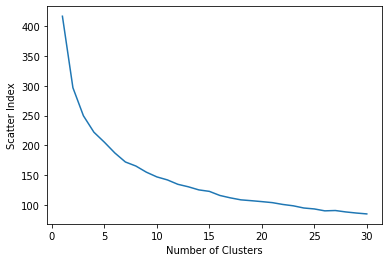

time: 11min 21s (started: 2022-04-05 18:57:16 +05:30)


In [12]:
#Plotting the scatter indices for KMeans Clustering with 1-30 clusters
optimalK(data.values,30)

For the current run, we can see that the "elbow" of the graph is at around 9 iterations. This value is chosen as the optimal k and is used to make the final cluster label predictions.

In [13]:
model=KMeans(k=9,max_iters=200)
predictions=model.predict(data.values)+1;

time: 9.8 s (started: 2022-04-05 19:08:37 +05:30)


In [14]:
#Storing the results in a .out file with appropriate name
with open('19EC30055_P3.out','w') as opf:
    for preds in predictions:
        opf.write('%d ' % preds)

time: 0 ns (started: 2022-04-05 19:08:47 +05:30)


### Further Analysis: K-Means with One-Hot Encoding of Categorical Data

Note: The analysis with One Hot Encoding is done as an extra analysis beyond what is asked and observations and conclusions are noted in the README file.

For categorical attributes without any ordinal relationship, the integer encoding of categories is replaced with new binary attributes. The number of binary attributes depends on the number of categories in the original attribute. These binary attributes are also called dummy attributes and are a useful means of representing non-numerical values. For example, 'Settlement Size' is an attribute with values 0, 1 and 2 representing small, mid-sized and big cities respectively. These can be replaced by three binary attributes namely, 'Small city', 'Mid-sized city' and 'Big city' respectively. If the 'Settlement Size' for a particular data entry was initially 2 (big city), the three new attributes will have the values 0, 0 and 1 respectively. Similar encoding is done for all the categorical attributes as shown below.

In [15]:
#Performing One Hot Encoding For Columns Holding Categorical Data - 'Sex', 'Marital Status', 
#'Education', 'Occupation', 'Settlement Size'
ohe_sex=pd.get_dummies(df['Sex'])
df=df.drop('Sex',axis=1)
df=df.join(ohe_sex)
df.rename(columns = {0:'Male', 1:'Female'}, inplace = True)

ohe_wed=pd.get_dummies(df['Marital status'])
df=df.drop('Marital status',axis=1)
df=df.join(ohe_wed)
df.rename(columns = {0:'Single', 1:'Non-single'}, inplace = True)

ohe_edu=pd.get_dummies(df['Education'])
df=df.drop('Education',axis=1)
df=df.join(ohe_edu)
df.rename(columns = {0:'Other', 1:'High school', 2:'University', 3:'Graduate school'}, inplace = True)

ohe_occ=pd.get_dummies(df['Occupation'])
df=df.drop('Occupation',axis=1)
df=df.join(ohe_occ)
df.rename(columns = {0:'Unemployed/ Unskilled', 1:'Skilled employee/ official', 2:'Highly qualified'}, inplace = True)

ohe_ss=pd.get_dummies(df['Settlement size'])
df=df.drop('Settlement size',axis=1)
df=df.join(ohe_ss)
df.rename(columns = {0:'Small city', 1:'Mid-sized city', 2:'Big city'}, inplace = True)

df.head(10)

,Age,Income,Male,Female,Single,Non-single,Other,High school,University,Graduate school,Unemployed/ Unskilled,Skilled employee/ official,Highly qualified,Small city,Mid-sized city,Big city
0,67,124670,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,22,150773,0,1,0,1,0,1,0,0,0,1,0,0,0,1
2,49,89210,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,45,171565,1,0,1,0,0,1,0,0,0,1,0,0,1,0
4,53,149031,1,0,1,0,0,1,0,0,0,1,0,0,1,0
5,35,144848,1,0,1,0,0,1,0,0,1,0,0,1,0,0
6,53,156495,1,0,1,0,0,1,0,0,0,1,0,0,1,0
7,35,193621,1,0,1,0,0,1,0,0,0,0,1,0,1,0
8,61,151591,1,0,0,1,0,0,1,0,1,0,0,1,0,0
9,28,174646,1,0,0,1,0,1,0,0,0,0,1,1,0,0


time: 47 ms (started: 2022-04-05 19:08:47 +05:30)


In [16]:
normalize(df)
df.head(10)

,Age,Income,Male,Female,Single,Non-single,Other,High school,University,Graduate school,Unemployed/ Unskilled,Skilled employee/ official,Highly qualified,Small city,Mid-sized city,Big city
0,0.844828,0.324781,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.068966,0.420210,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.534483,0.195144,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.465517,0.496223,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.603448,0.413842,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.293103,0.398549,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.603448,0.441129,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.293103,0.576858,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.741379,0.423201,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.172414,0.507487,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


time: 31 ms (started: 2022-04-05 19:08:47 +05:30)


In [17]:
df.describe()

,Age,Income,Male,Female,Single,Non-single,Other,High school,University,Graduate school,Unemployed/ Unskilled,Skilled employee/ official,Highly qualified,Small city,Mid-sized city,Big city
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.308776,0.311197,0.543000,0.457000,0.503500,0.496500,0.14350,0.693000,0.145500,0.018000,0.316500,0.556500,0.127000,0.494500,0.272000,0.233500
std,0.202059,0.139321,0.498272,0.498272,0.500113,0.500113,0.35067,0.461365,0.352692,0.132984,0.465227,0.496922,0.333056,0.500095,0.445101,0.423163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155172,0.226048,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.258621,0.291434,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.413793,0.373778,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


time: 47 ms (started: 2022-04-05 19:08:47 +05:30)


k =  1 : Done!
k =  2 : Done!
k =  3 : Done!
k =  4 : Done!
k =  5 : Done!
k =  6 : Done!
k =  7 : Done!
k =  8 : Done!
k =  9 : Done!
k =  10 : Done!
k =  11 : Done!
k =  12 : Done!
k =  13 : Done!
k =  14 : Done!
k =  15 : Done!
k =  16 : Done!
k =  17 : Done!
k =  18 : Done!
k =  19 : Done!
k =  20 : Done!
k =  21 : Done!
k =  22 : Done!
k =  23 : Done!
k =  24 : Done!
k =  25 : Done!
k =  26 : Done!
k =  27 : Done!
k =  28 : Done!
k =  29 : Done!
k =  30 : Done!


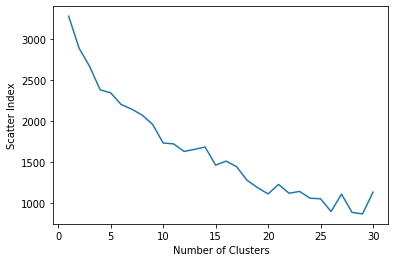

time: 1min 43s (started: 2022-04-05 19:08:47 +05:30)


In [18]:
optimalK(df.values,30) #Setting kmax=30

k =  1 : Done!
k =  2 : Done!
k =  3 : Done!
k =  4 : Done!
k =  5 : Done!
k =  6 : Done!
k =  7 : Done!
k =  8 : Done!
k =  9 : Done!
k =  10 : Done!
k =  11 : Done!
k =  12 : Done!
k =  13 : Done!
k =  14 : Done!
k =  15 : Done!
k =  16 : Done!
k =  17 : Done!
k =  18 : Done!
k =  19 : Done!
k =  20 : Done!
k =  21 : Done!
k =  22 : Done!
k =  23 : Done!
k =  24 : Done!
k =  25 : Done!
k =  26 : Done!
k =  27 : Done!
k =  28 : Done!
k =  29 : Done!
k =  30 : Done!
k =  31 : Done!
k =  32 : Done!
k =  33 : Done!
k =  34 : Done!
k =  35 : Done!
k =  36 : Done!
k =  37 : Done!
k =  38 : Done!
k =  39 : Done!
k =  40 : Done!
k =  41 : Done!
k =  42 : Done!
k =  43 : Done!
k =  44 : Done!
k =  45 : Done!
k =  46 : Done!
k =  47 : Done!
k =  48 : Done!
k =  49 : Done!
k =  50 : Done!


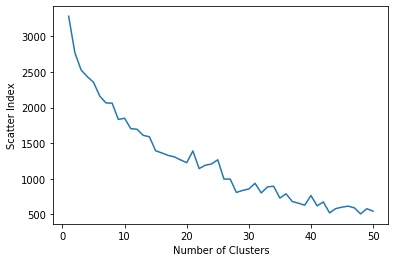

time: 5min 34s (started: 2022-04-05 19:10:30 +05:30)


In [19]:
optimalK(df.values,50) #Setting kmax=50

Due to the existence of a larger number of attributes after OHE (a new attribute is created for each possible category associated with the columns of categorical data), the convergence is achieved faster (as can be seen from the reduction in the computation time) but several outlier points are also observed and the curve appears jagged. This is the curse of dimensionality. The "elbow" is not very prominent even when 30 clusters are considered. Upon considering 50 clusters, the "elbow" can be somewhat perceived at approximately 27 clusters. The predictions made using 27 clusters are stored in the file '19EC30055_P3_OHE.out'.

In [20]:
model=KMeans(k=27,max_iters=200)
predictions=model.predict(df.values)+1;
with open('19EC30055_P3_OHE.out','w') as opf:
    for preds in predictions:
        opf.write('%d ' % preds)

time: 6.09 s (started: 2022-04-05 19:16:05 +05:30)


## --------END--------